## Project 2 - Batting Data Analysis

### Introduction

In this project we are going to be working with batting data provided by Sean Lahman. Each row of the data relates to one season of one player, from the team and the year played to the number of homeruns meade in that season. It refers to different leagues. However, in some of our investigations we will be focusing on just the National League. This dataset has data recorded from 1871 to 2015.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# we will use the %pylab inline so the graph appears in the notebook
import seaborn as sns

Once we have imported the necessary libraries we load the dataset

In [2]:
batting = pd.read_csv("Batting.csv")

Lets take a look at the dataset

In [3]:
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


### 1.
#### Filling the data
As we can see there are some NaNs in the data set, so we decided to fill these blanks with 0 so we can make complete calculations. The fill with 0 is because we can understand that if a player has a record here he must have done something.

In [4]:
len(batting)

101332

In [5]:
batting_filled = batting.fillna(value=0)

In [6]:
# Lets check the different types of the dataset we are using
batting_filled.dtypes

playerID     object
yearID        int64
stint         int64
teamID       object
lgID         object
G             int64
AB          float64
R           float64
H           float64
2B          float64
3B          float64
HR          float64
RBI         float64
SB          float64
CS          float64
BB          float64
SO          float64
IBB         float64
HBP         float64
SH          float64
SF          float64
GIDP        float64
dtype: object

#### What is the mean of the batting of the whole dataset and who has had the best season in history?
Thanks to information provided we have learnt that the batting average is calculated by dividing the H varible (number of hits) by the AB varible (number of times stepped up to the plate)  

In [146]:
# trying out some basic funtionc of Pandas Data Frame
(batting_filled['H']/batting_filled['AB']).mean()

0.2090245512805901

In [147]:
(batting_filled['H']/batting_filled['AB']).max()

1.0

In [148]:
batting_filled.iloc[(batting_filled['H']/batting_filled['AB']).argmax()]

playerID    snowch01
yearID          1874
stint              1
teamID           BR2
lgID               0
G                  1
AB                 1
R                  0
H                  1
2B                 0
3B                 0
HR                 0
RBI                0
SB                 0
CS                 0
BB                 0
SO                 0
IBB                0
HBP                0
SH                 0
SF                 0
GIDP               0
ability            1
Name: 500, dtype: object

The calculations here have been done as if every entry was a different player. However, as we saw during the investigation of the data, there are several entries for the same player depending on the year player and sometimes changing the team too. In the next entries we will investigate different ways of treating the data, given that this way doesnt show the players development through the years

##### Who has the best batting score in history?
##### what is the mean batting for a player?

In [10]:
# Lets goup our data so every entry is a player
batting_group_player = batting_filled.groupby(['playerID'])

In [11]:
len(batting_group_player)

18659

In [156]:
player_means = batting_group_player['H'].mean() / batting_group_player['AB'].mean()

In [157]:
player_means.mean()

0.1907916282071391

#### Conlusion 
Here we see that the difference between the mean of the sseason and the mean of the player are pretty close, about 0.01 difference, so we realize that the average of one season is as affected by the bad seasons of a player as the ones based of whole players. 

In [14]:
maximum_batter = player_means.argmax()

In [139]:
# Showing the carreer of the player
batting_filled.loc[batting_filled['playerID'] == maximum_batter]

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,ability
61930,puckeki01,1984,1,MIN,AL,128,557.0,63.0,165.0,12.0,...,14.0,7.0,16.0,69.0,1.0,4.0,4.0,2.0,11.0,204.0
62938,puckeki01,1985,1,MIN,AL,161,691.0,80.0,199.0,29.0,...,21.0,12.0,41.0,87.0,0.0,4.0,5.0,3.0,9.0,312.0
63958,puckeki01,1986,1,MIN,AL,161,680.0,119.0,223.0,37.0,...,20.0,12.0,34.0,99.0,4.0,7.0,2.0,0.0,14.0,439.0
65013,puckeki01,1987,1,MIN,AL,157,624.0,96.0,207.0,32.0,...,12.0,7.0,32.0,91.0,7.0,6.0,0.0,6.0,16.0,398.0
66042,puckeki01,1988,1,MIN,AL,158,657.0,109.0,234.0,42.0,...,6.0,7.0,23.0,83.0,4.0,2.0,0.0,9.0,17.0,429.0
67100,puckeki01,1989,1,MIN,AL,159,635.0,75.0,215.0,45.0,...,11.0,4.0,41.0,59.0,9.0,3.0,0.0,5.0,21.0,353.0
68223,puckeki01,1990,1,MIN,AL,146,551.0,82.0,164.0,40.0,...,5.0,4.0,57.0,73.0,11.0,3.0,1.0,3.0,15.0,301.0
69317,puckeki01,1991,1,MIN,AL,152,611.0,92.0,195.0,29.0,...,11.0,5.0,31.0,78.0,4.0,4.0,8.0,7.0,27.0,331.0
70377,puckeki01,1992,1,MIN,AL,160,639.0,104.0,210.0,38.0,...,17.0,7.0,44.0,97.0,13.0,6.0,1.0,6.0,17.0,374.0
71540,puckeki01,1993,1,MIN,AL,156,622.0,89.0,184.0,39.0,...,8.0,6.0,47.0,93.0,7.0,7.0,1.0,5.0,15.0,359.0


As we can see the player with the best batting scores in history is puckeki01 wich thanks to some research we found out that it referred to Kirby Puckett.

#### Conclusions
As we can se with this dataset we have been able to see different aspects of the batting but we have to realize that having the best batting score doesnt mean that you are the best baseball player. Given the fact those battings that end up in no bases or points acomplished are also taken into account like when the ball doenst land in fair territory.
So in the next cells we will be ansering multiple questions now based on the bases and homeruns achieved.

### 2. 
In our data we have three columns that gives us insight about the players ability to bat. The first one is H which counts all the hits that ended up in winning one base. The second is the 2B column wich specfies the number of times the player has achieved a 2 base hit, the same goes for the 3B for 3 base hit. Finally we have the HR variable wich has all the homeruns achieved by the player

In order to stablish a ranking system to see who is the best player, we have decided to give different weights to each of the previous variables. the rule we are going to apply is the following: 
hx1 + 2bx2 + 3bx3 + hrx4
I think this should give us a really good insight about the performace of the players throught the years

In [16]:
# calculate the formula stated before
batting_ability = batting_filled['H'] + batting_filled['2B']*2 + batting_filled['3B']*3 + batting_filled['HR']*4
#Lets add a new column to our dataframe
batting_filled['ability'] = pd.Series(batting_ability, index=batting_filled)

In [17]:
# Now fill it with the calculated data
batting_filled['ability'] = batting_ability

In [140]:
# group by each player
batting_player = batting_filled.groupby(['playerID'])
# now we calculate the means of every player
batting_player_means = batting_player['ability'].mean()
# now we get the years played by the player with the best mean
years = list(batting_player['yearID'].get_group(batting_player_means.argmax()))
#now we get the start and end of his carreer
start = years[0]
end = years[len(years)-1]
print "the best player is " + batting_player_means.argmax() + " with and score of " + str(batting_player_means.max()) + ", he played from " + str(start) + " to " +  str(end)
if end == 2015:
    print "Probably he is still playing"

the best player is pujolal01with and score of 408.0, he played from 2001 to 2015
Probably he is still playing


In [19]:
# Now we see the mean of all of the players
batting_player_means.mean()

36.07847294868628

Populating the interactive namespace from numpy and matplotlib


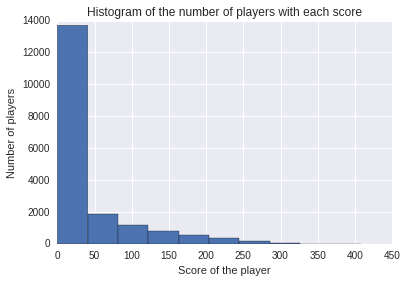

In [142]:
%pylab inline
batting_player_means.hist()
plt.xlabel('Score of the player')
plt.ylabel('Number of players')
plt.title('Histogram of the number of players with each score')
#TODO add the title and axes of the graphs

In [21]:
# we check if the graph has sense given the number of players
len(batting_player_means)

18659

#### Conlusion
Thanks to this histogram we can see the great difference between the mean and the maximum. As we expected if we give some thought to the game there are a lot of "normal level" players and there are some exceptional ones, as the histogram shows us.The graph is decresing with a drastical drop at the start and then a steady drop

### 3. 
This time instead of repeating all the previous calculations we are going to be focusing on the preformance of the player or team. We also want to make some comparations between the performace of the teams along the years in order to discover if those teams now considered "the best" have always been or if it changes during time.

From now on we are going to focus solely in the National Leage of baseball given that those are the teams from which I wish to learn and understand

#### Which team has the best ability value?

In [143]:
# From the whole data we separate just the players from the National League
batting_NL = batting_filled.loc[lambda batting_filled: batting_filled.lgID == 'NL', :]
# Once we have the players from the National League we group it by teams
batting_team = batting_NL.groupby(['teamID'])

In [32]:
# Now we check the mean of our ability data
batting_team_mean = batting_team['ability'].mean()
print "Number of teams: " + str(len(batting_team_mean))
print "Average ability of the teams: " + str(batting_team_mean.mean())
print "Best team in history: " + batting_team_mean.argmax() + " With a value of: " + str(batting_team_mean.max())

Number of teams: 44
Average ability of the teams: 64.2244113358
Best team in history: BLN With a value of: 95.2864583333


In [33]:
#lets try now to see the the progression of this team throught his years 
batting_team_BLN = batting_team.get_group(batting_team_mean.argmax())
batting_team_BLN_year = batting_team_BLN.groupby(['yearID'])
batting_team_BLN_year_mean = batting_team_BLN_year['ability'].mean()
batting_team_BLN_year_mean

yearID
1892     57.162162
1893     79.000000
1894    138.550000
1895    118.350000
1896    107.000000
1897    117.200000
1898     90.458333
1899     91.583333
Name: ability, dtype: float64

Populating the interactive namespace from numpy and matplotlib


([<matplotlib.axis.XTick at 0x7fe5adaf90d0>,
 <a list of 8 Text xticklabel objects>)

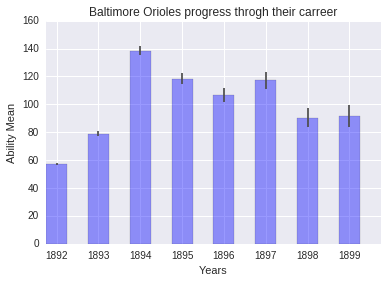

In [162]:
# Now we need to show this information in a graph
%pylab inline
index = np.arange(len(batting_team_BLN_year_mean))
bar_width = 0.5
index_graph = (1, 2, 3, 4, 5, 6, 7, 8)
opacity = 0.4
error_config = {'ecolor': '0.3'}
plt.bar(index, batting_team_BLN_year_mean, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=index_graph,
                 error_kw=error_config,
                 label='year')
plt.xlabel('Years')
plt.ylabel('Ability Mean')
plt.title('Baltimore Orioles progress throgh their carreer')
plt.xticks(index + bar_width/2, batting_team_BLN_year_mean.index)

#### Is there any relationship between the homeruns and the different bases of the teams in the National League?

In [167]:
# we are going to try one simple comparation of the means of the 2 bases, 3 bases and homeruns 
# of every player in the National League
def mean_bases(dataset):
    mean_list = []
    mean_list.append(dataset['2B'].mean())
    mean_list.append(dataset['3B'].mean())
    mean_list.append(dataset['HR'].mean())
    return

Populating the interactive namespace from numpy and matplotlib


([<matplotlib.axis.XTick at 0x7fe5ac533ad0>,
 <a list of 3 Text xticklabel objects>)

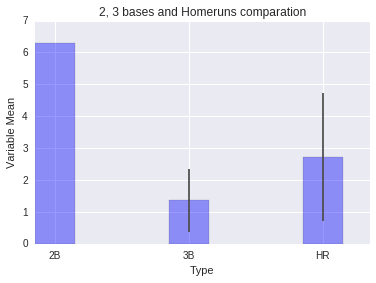

In [174]:
%pylab inline
index = np.arange(3)
bar_width = 0.3
index_graph = range(3)
opacity = 0.4
error_config = {'ecolor': '0.3'}
mean_hist = mean_bases(batting_NL)
plt.bar(index, mean_hist, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=index_graph,
                 error_kw=error_config,
                 label='year')
plt.xlabel('Type')
plt.ylabel('Variable Mean')
plt.title('2, 3 bases and Homeruns comparation')
plt.xticks(index + bar_width/2, ['2B', '3B', 'HR'])

#### Conclusions
As we expected there has been a greater number of 2 base hits than 3 base hits. However it seems curious that there has been more homeruns on average the 3 base hits. This raises the question of how does it compare to the means of the best team of the league, which we found out it was the Baltimore Orioles

#### How does the previous data compare to the Baltimore Orioles team (the best team in the National Leagues history)?

In [175]:
mean_bases(batting_team_BLN)

[8.53125, 3.90625, 0.96875]

Populating the interactive namespace from numpy and matplotlib


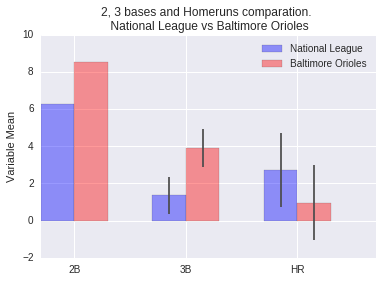

In [186]:
%pylab inline
index = np.arange(3)
bar_width = 0.3
index_graph = range(3)
opacity = 0.4
error_config = {'ecolor': '0.3'}
mean_hist_BLN = mean_bases(batting_team_BLN)
fig, ax = plt.subplots()
nl = ax.bar(index, mean_hist, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=index_graph,
                 error_kw=error_config,
                 label='year')
bln = ax.bar(index+bar_width, mean_hist_BLN, bar_width,
                 alpha=opacity,
                 color='r',
                 yerr=index_graph,
                 error_kw=error_config,
                 label='year')

ax.set_ylabel('Variable Mean')
ax.set_title('2, 3 bases and Homeruns comparation. \n National League vs Baltimore Orioles')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(['2B', '3B', 'HR'])
ax.legend((nl[0], bln[0]), ('National League', 'Baltimore Orioles'))

#### Conlusions
Here we can see the difference between the means of 2B, 3B and HR of the whole National League and the Baltimore Orioles. We see a considerable difference in all three aspects. Surprisingly they have a lesser average in homeruns but a great cuantity of 2 bases and 3 bases. This shows us that to be the best team you dont have to make all homeruns, but a great cuantity of 2 and 3 bases.

Once we were able to determine which team has had the best performace I find curious to konw that this team was disasembled 27 years ago, so it raised the question of
#### What team has been in the national leage for the longest time?

In [144]:
maxim = -1
max_team = 0
# Frist we get only the columns of the teams and years
aux_batting_team = batting_NL[['teamID', 'yearID']]
# We remove the duplicates
aux_batting_team = aux_batting_team.drop_duplicates()
#Once the data is clean we group it by team
aux_batting_team = aux_batting_team.groupby(['teamID'])
# Now we apply the len function in order to get the lengths of every array of the years created thanks to the group by
# So we will obtain a series with the name of the team and the number of years played 
years_played = aux_batting_team.apply(len)
maxim = years_played.max()
max_team = years_played.argmax()

In [37]:
print "The " + max_team + " team has been in the league for " + str(maxim) + " years"
years = list(batting_team['yearID'].get_group(max_team))
print "They started in " + str(years[0])
if years[len(years)-1] == 2015:
    print "and probably they will be for even more years"

The CHN team has been in the league for 140 years
They started in 1876
and probably they will be for even more years


In [135]:
# Now we want to see the progress of the team during its years in the National League

batting_team_CHN = batting_team.get_group('CHN')
batting_team_CHN_year = batting_team_CHN.groupby(['yearID'])
batting_team_CHN_year_mean = batting_team_CHN_year['ability'].mean()
# Given that the team has been for 140 years the histogram would be to hard to read so we are going to group the data in 10 year bins
batting_team_CHN_ten_year = []
i_control = 0
mean_control = 0
# first we calculate the mean in bins of 10
for elem in batting_team_CHN_year_mean:
    mean_control += elem
    i_control += 1
    if i_control == 9:
        i_control = 0
        batting_team_CHN_ten_year.append(mean_control/10)
        mean_control = 0
# We create the index list we will use for our data
index_CHN = []
a, b = pd.cut(index_list, 14, retbins=True, precision = 0)
index_CHN = b.round()

Due to the fact that the team has been in the league for 140, a graph showing all that performace could prove difficult to read, so in order to simplyfy we have group the data in ten-year intervals for a simplify bar graph

Populating the interactive namespace from numpy and matplotlib
Current size: [6.0, 4.0]


([<matplotlib.axis.XTick at 0x7fe5b0274190>,
 <a list of 15 Text xticklabel objects>)

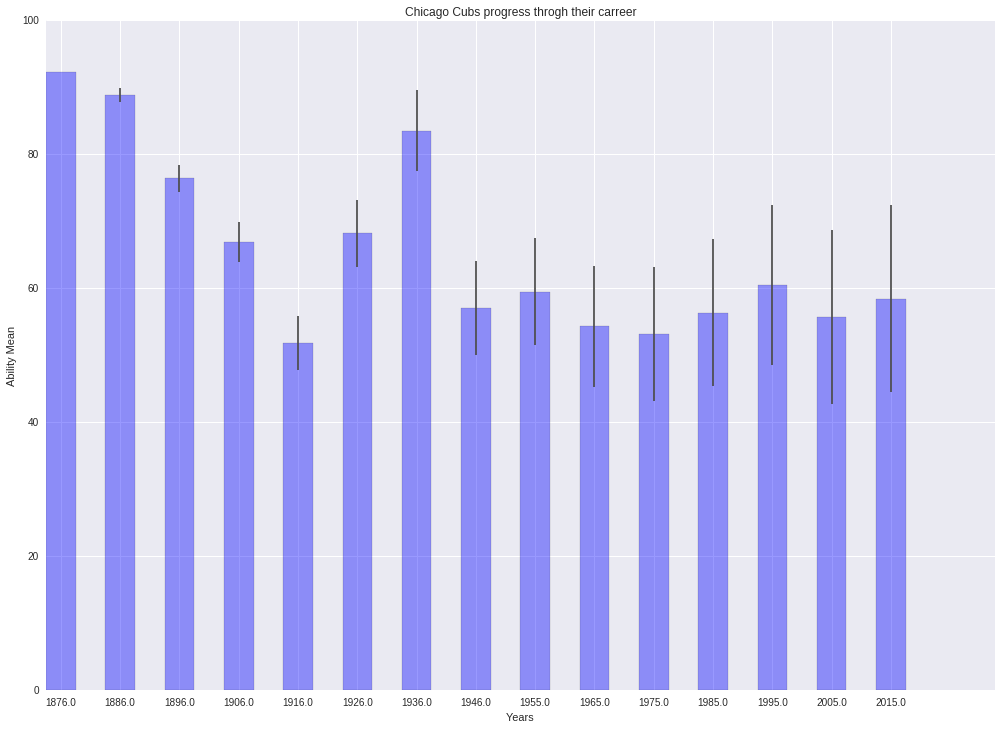

In [163]:
#Now we draw the graph
%pylab inline
index = np.arange(len(batting_team_CHN_year_mean)/10+1)
bar_width = 0.5
index_graph = range(len(batting_team_CHN_year_mean)/10+1)

opacity = 0.4
error_config = {'ecolor': '0.3'}
# Here we check and change the size of the graph so it can be readable
fig_size = plt.rcParams["figure.figsize"]
print "Current size:", fig_size
fig_size[0] = 17
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
# Plot ad stablish title and axis
plt.bar(index, batting_team_CHN_ten_year, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=index_graph,
                 error_kw=error_config,
                 label='year')
plt.xlabel('Years')
plt.ylabel('Ability Mean')
plt.title('Chicago Cubs progress throgh their carreer')
plt.xticks(index + bar_width/2, index_CHN)

Thanks to some research we were able to show the development in ten year intervals. As we can see the peak was in their begings but they have been able to stay close to the average.

In [137]:
# Now we check out the performance of the player throut the years
#first by grouping the national leage data by year
batting_year = batting_NL.groupby(['yearID'])
Than we obtain the basic statistics
batting_year_mean = batting_year['ability'].mean()
print str(batting_year_mean.mean())
print str(batting_year_mean.max())
print str(batting_year_mean.argmax())

67.3811452065
100.336734694
1894


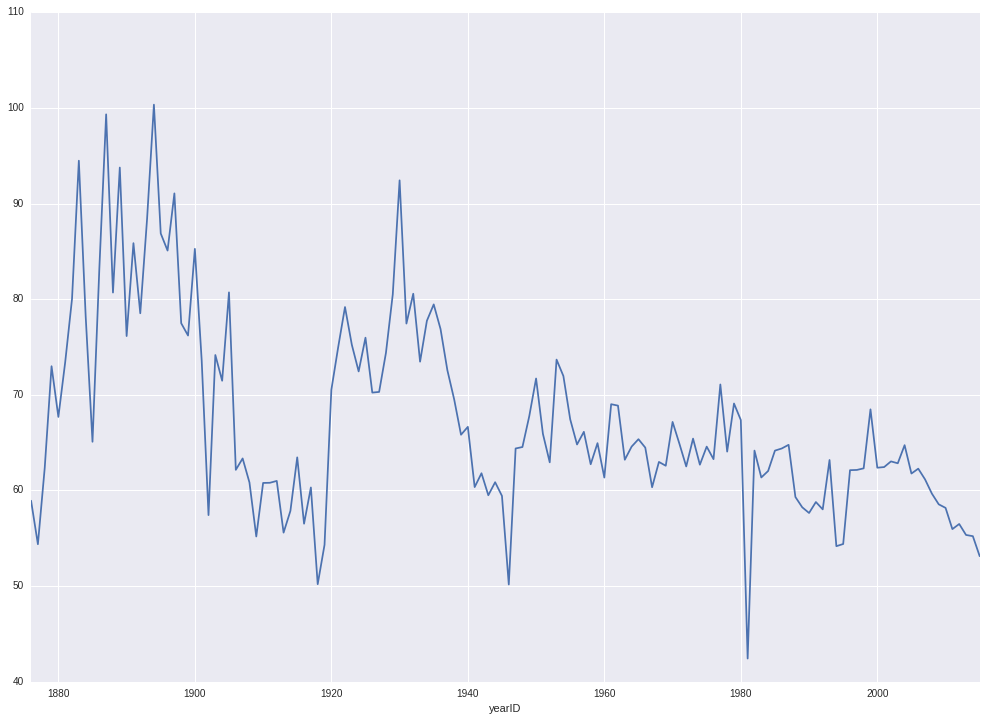

In [138]:
# we plot the data so we can take a look
batting_year_mean.plot()

Here we can see the development of the National League throught the years. Thanks to the previous mean we imagine the maximum to be around late 1980s. However seeing the graph we discover an acute drop near 1980, so we are going to look what is the minimum and take a look at the expanded data in order to find out why that happend

In [45]:
print str(batting_year_mean.min())
print str(batting_year_mean.argmin())

42.4346846847
1981


As we expected the worst year for baseball was in 1981 so far, with a mean for the year 42.43, although the global mean for baseball is 67.38. In order to see how possible is to for this results to repeat again we are going to use the standard deviation

In [55]:
# Here we want to check how probable is to have another bad year
# we start by calculating the standard deviation
year_std = batting_year_mean.std()
# Then we calculate how many standard deviation from the mean is that year
std_from_mean = (batting_year_mean.mean() - batting_year_mean.min()) / year_std
print "the 1981 result is " + str(std_from_mean.round(2)) + " standard deviations from the mean"

the 1981 result is 2.44 standard deviations from the mean


#### Conclusions
Once we now the standard deviation from the mean we just have to take a look to the z table to see the probability of having another year like this one. Once we look in http://www.stat.ufl.edu/~athienit/Tables/Ztable.pdf we found out that the probability of having a year like this is 0.0073.
So we can assume that the chance of having another year like this, based on our calculations, is really slim.

## Bilbliography

* t-table : http://www.stat.ufl.edu/~athienit/Tables/Ztable.pdf
* standard deviation : http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html
* round : http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.round.html
* change size of plot : https://codeyarns.com/2014/10/27/how-to-change-size-of-matplotlib-plot/
* plot bar: http://matplotlib.org/examples/api/barchart_demo.html
* team abbreviations : https://www.reddit.com/r/baseball/comments/3t97mi/team_abbreviations/
* baltimore orioles : http://www.baseball-reference.com/teams/BLN/1895.shtml
* group_by itearte : http://stackoverflow.com/questions/27405483/how-to-loop-over-grouped-pandas-dataframe
* get_group : http://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.GroupBy.get_group.html
* group_by : http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html